## 1. Import Standard Libraries

In [1]:
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional  as F

## 2. Get the Data

In [4]:
mnist=pd.read_csv("Mnist_combined.csv",index_col=0)

In [5]:
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mnist.shape

(70000, 785)

## 3. Convert the Data into Tensor Dataset

In [7]:
X = mnist.drop(labels = "label" ,axis = 1)
Y = mnist["label"]

In [8]:
Y.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [9]:
data_np = X.to_numpy()
labels_np = Y.to_numpy()

In [10]:
data_np[0].shape

(784,)

In [11]:
labels_np.shape

(70000,)

In [12]:
labels_np

array([5, 0, 4, ..., 4, 5, 6], dtype=int64)

In [13]:
#labels_np=labels_np[:,None]

In [14]:
# normalize the data to a range of [0 1]
dataNorm = data_np / np.max(data_np)

In [15]:
dataNorm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Converting Numpy array to Pytorch Array

In [16]:
# convert to a pytorch tensor
data = torch.tensor(data_np).float()

# Note: "long" format for CCE : Multiclass classification
labels = torch.tensor(labels_np).long() 

In [17]:
labels

tensor([5, 0, 4,  ..., 4, 5, 6])

#### Train and Test Loader

In [18]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

In [19]:
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.1)

In [20]:
train_labels.shape

torch.Size([63000])

In [21]:
test_labels.shape

torch.Size([7000])

In [22]:
# scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.1)

In [23]:
# convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

In [24]:
train_data.tensors

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([8, 7, 9,  ..., 0, 3, 6]))

In [25]:
# finally, translate into dataloader objects

batchsize    = 32
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True  ,drop_last=True)
test_loader  = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0] )

## 4. Create and validate the model

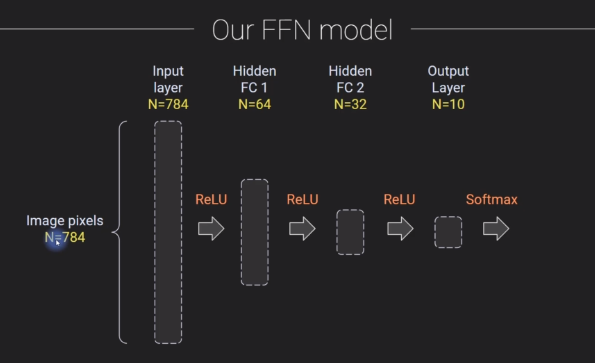

In [26]:
# create a class for the model
def createTheMNISTNet(LR):

    class MNISTNet(nn.Module):
        
        def __init__(self):
            super().__init__()

            ### Input layer
            self.input = nn.Linear(784,64)

            ### Hidden layer-1
            self.fc1 = nn.Linear(64,32)
            
            ### Hidden Layer-2
            self.fc2 = nn.Linear(32,32)

            ### Output layer
            self.output = nn.Linear(32,10)

        # forward pass
        def forward(self,x):
            
            # Input  Layer
            x = F.relu( self.input(x) ) 
            # Hidden Layer-1
            x = F.relu( self.fc1(x) )
            # Hidden Layer-2
            x = F.relu(self.fc2(x))
            
            return self.output(x)
        
    # create the model instance
    ANN_model = MNISTNet()

    # loss function : Negative Log-Likelihood Loss function
    lossfunc = nn.CrossEntropyLoss()

    # optimizer
    optimizer = torch.optim.Adam(ANN_model.parameters(),lr=LR)

    return ANN_model,lossfunc,optimizer

In [27]:
tmpnet = createTheMNISTNet(LR=0.001)[0]
print(tmpnet)

print("fc1 Shape : ",tmpnet.fc1.weight.shape)

print('\n\nWeights for layer fc1:')
print(tmpnet.fc1.weight.data)

MNISTNet(
  (input): Linear(in_features=784, out_features=64, bias=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=10, bias=True)
)
fc1 Shape :  torch.Size([32, 64])


Weights for layer fc1:
tensor([[ 0.1063, -0.0075,  0.0942,  ...,  0.1059,  0.1214,  0.1005],
        [ 0.0188,  0.0307,  0.0426,  ..., -0.0970,  0.0772,  0.1029],
        [-0.0122, -0.0974,  0.0901,  ..., -0.0947,  0.1176, -0.1121],
        ...,
        [ 0.1212,  0.0650, -0.1241,  ...,  0.0046, -0.1225, -0.0108],
        [ 0.0623,  0.0717, -0.0512,  ...,  0.0239,  0.0743, -0.0252],
        [-0.0979, -0.0972,  0.0960,  ...,  0.0300, -0.0891,  0.0728]])


## 5. Model Training

In [28]:
def function2trainTheModel(Model , lossfunc , optimizer ,train_loader , test_loader , epochs):

    losses   = torch.zeros(epochs)
    trainAcc = []
    testAcc  = []

    # loop over epochs
    for epochi in range(epochs):

        # switch on training mode
        Model.train()

        # loop over training data batches
        batchAcc  = []
        batchLoss = []
    
        # Batch Training
        for X,y in train_loader:

            # Forward pass and loss
            yHat_train = Model(X)
            loss = lossfunc(yHat_train,y)

            # Backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Loss from this batch
            batchLoss.append(loss.item())

            # Compute accuracy
            matches = torch.argmax(yHat_train,axis=1) == y     # booleans (false/true)
            matchesNumeric = matches.float()             # convert to numbers (0/1)
            accuracyPct = 100*torch.mean(matchesNumeric) # average and x100 
            batchAcc.append( accuracyPct )               # add to list of accuracies
        # End of batch loop...

        # Now that we've trained through the batches, get their average training accuracy
        trainAcc.append( np.round(np.mean(batchAcc),2 ))

        # Get average losses across the batches
        losses[epochi] = np.round(np.mean(batchLoss),2)

        # test accuracy
        Model.eval()
        X,y = next(iter(test_loader)) # extract X,y from test dataloader
        with torch.no_grad():         # deactivates autograd
            yHat_test = Model(X)
      
        # compare the following really long line of code to the training accuracy lines
        testAcc.append( np.round(100*torch.mean((torch.argmax(yHat_test,axis=1)==y).float()),2 ) )
        # End epochs

    # function output
    return trainAcc,testAcc,losses,Model

## 6. Model Training

In [29]:
# This cell takes 3 mins
numepochs=10
LR=0.001 # keep the LR low in case of ADAM, for SGD LR=0.01

# create and train a model with Batch-Normalization
ANN_model,Lossfunc,Optimizer = createTheMNISTNet(LR)

TrainAcc_base,TestAcc_base,Losses_base,trained_Model_base = function2trainTheModel(Model=ANN_model , 
                                                               lossfunc=Lossfunc , 
                                                               optimizer=Optimizer,
                                                               train_loader=train_loader , 
                                                               test_loader=test_loader, 
                                                               epochs=numepochs)


## 7. Results Visualization

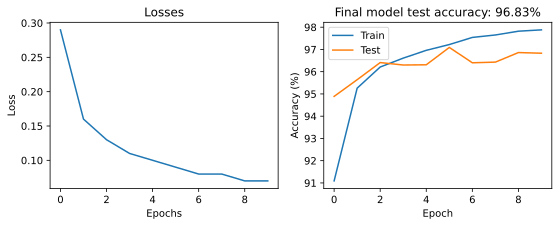

In [32]:
fig,ax = plt.subplots(1,2,figsize=(9,3))

ax[0].plot(Losses_base.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses')

ax[1].plot(TrainAcc_base,label='Train')
ax[1].plot(TestAcc_base, label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title(f'Final model test accuracy: {TestAcc_base[-1]:.2f}%')
ax[1].legend()

plt.show()

## 8. Weight Initialization

### (i) Set all the weights of layer fc1 to zero

#### (a)  Create ANN model

In [ ]:
# torch.zeros(size=(5,3))

In [33]:
# create the Model

LR=0.001       # keep the LR low in case of ADAM, for SGD LR=0.01
ANN_model_zero, Lossfunc_zero, Optimizer_zero = createTheMNISTNet(LR=0.001)

#### (b) Setting weights of layer fc1 to zero

In [34]:
ANN_model_zero.fc1.weight

Parameter containing:
tensor([[-0.0758, -0.1204, -0.0814,  ...,  0.0224, -0.0624, -0.0535],
        [-0.0904,  0.0128, -0.0525,  ..., -0.1218, -0.1226, -0.1003],
        [-0.1199, -0.0815,  0.0974,  ...,  0.0392,  0.0489,  0.1193],
        ...,
        [ 0.0220, -0.0032, -0.0550,  ..., -0.0084, -0.1211, -0.0947],
        [-0.0881,  0.0228,  0.1235,  ..., -0.0675,  0.0924, -0.0172],
        [ 0.0016,  0.0751, -0.1153,  ...,  0.1021, -0.0170, -0.0201]],
       requires_grad=True)

In [35]:
ANN_model_zero.fc1.weight.shape

torch.Size([32, 64])

In [36]:
# Change the weights before training

# set fc1 weights to zeros
ANN_model_zero.fc1.weight.data = torch.zeros( size=ANN_model_zero.fc1.weight.shape)

# aliter L: ANN_model1.fc1.weight.data = torch.zeros_like( ANN_model1.fc1.weight )

# confirm
print("fc1 weight matrix : \n", ANN_model_zero.fc1.weight.data)
print()
print("fc1 weight matrix shape : ", ANN_model_zero.fc1.weight.data.shape)

fc1 weight matrix : 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

fc1 weight matrix shape :  torch.Size([32, 64])


#### (c) Training the model

In [37]:
# This cell takes 3 mins
numepochs=10

# create and train a model with Batch-Normalization

TrainAcc_zero,TestAcc_zero,Losses_zero,trained_Model_zero = function2trainTheModel(
                                                               Model=ANN_model_zero , 
                                                               lossfunc=Lossfunc_zero , 
                                                               optimizer=Optimizer_zero,
                                                               train_loader=train_loader , 
                                                               test_loader=test_loader, 
                                                               epochs=numepochs)

#### (d) Results visualization

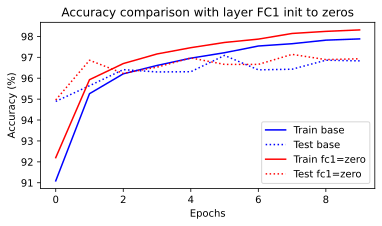

In [41]:
plt.figure(figsize=(6,3), dpi=135)

plt.plot(range(len(TrainAcc_base)),TrainAcc_base,'b-', range(len(TestAcc_base)),TestAcc_base ,'b:')
plt.plot(range(len(TrainAcc_zero)),TrainAcc_zero,'r-', range(len(TestAcc_zero)),TestAcc_zero ,'r:')

plt.legend(['Train base','Test base','Train fc1=zero','Test fc1=zero'])
plt.title('Accuracy comparison with layer FC1 init to zeros')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

plt.show()

tensor([[ 0.0669, -0.1235, -0.1160,  ...,  0.1669,  0.0123,  0.0047],
        [ 0.1782,  0.0640,  0.0315,  ...,  0.0078,  0.0140, -0.0024],
        [-0.1175,  0.1547, -0.0755,  ..., -0.1987,  0.0074, -0.0071],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.2215, -0.2302, -0.0745,  ..., -0.0288,  0.0211,  0.0061],
        [-0.1622, -0.1592, -0.1733,  ...,  0.0937, -0.0137,  0.0176]])


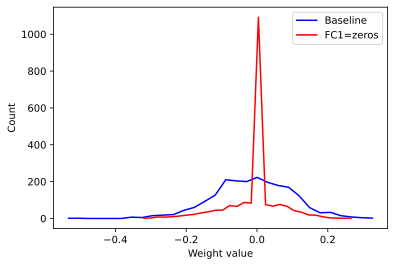

In [46]:
# Are the weights still zeros?
print(ANN_model_zero.fc1.weight.data)

# Show the distributions in a histogram
plt.figure(figsize=(6,4), dpi=135)

# Histogram for baseline model
y,x = np.histogram(ANN_model.fc1.weight.data.flatten(), bins=30)
plt.plot((x[1:]+x[:-1])/2, y, 'b', label='Baseline')

# Histogram for ANN_model_zero
y,x = np.histogram(ANN_model_zero.fc1.weight.data.flatten(),30)
plt.plot((x[1:]+x[:-1])/2,y,'r',label='FC1=zeros')

plt.legend()
plt.xlabel('Weight value')
plt.ylabel('Count')
plt.show()

### (ii) Experiment : Set all learnable parameters  to zero

#### (a)  Create th ANN model

In [47]:
LR=0.001       # keep the LR low in case of ADAM, for SGD LR=0.01
ANN_model_allzero, Lossfunc_allzero, Optimizer_allzero = createTheMNISTNet(LR=0.001)

#### (b) Set all the learnable parameters to zeros

In [48]:
ANN_model_allzero.named_parameters()

<generator object Module.named_parameters at 0x0000021F055ACC10>

In [52]:
# loop over parameters and set them all to zeros

for p in ANN_model_allzero.named_parameters():
    
    #print(p[0])  # name of the paramter
    #print()
    #print(p[1])  # data matrix or vector of the parameter
    
    p[1].data = torch.zeros(size=p[1].data.shape )
    # aliter : p[1].data = torch.zeros_like( p[1].data )

#### (c) Plot the parameters

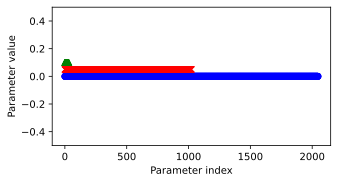

In [59]:
# Confirm for a few selected parameters (y-axis offset for visibility)
plt.figure(figsize=(5,2.5), dpi=135)

plt.plot(0+ANN_model_allzero.fc1.weight.data.flatten(),'bo')

plt.plot(0.05+ANN_model_allzero.fc2.weight.data.flatten(),'rx')

plt.plot(0.1+ANN_model_allzero.fc1.bias.data.flatten(),'g^')

plt.xlabel('Parameter index')
plt.ylim([-0.5,0.5])
plt.ylabel('Parameter value')

plt.show()

#### (d) Training the Model

In [60]:
# This cell takes 3 mins
numepochs=10

# create and train a model with Batch-Normalization

TrainAcc_allzero,TestAcc_allzero,Losses_allzero,trained_Model_allzero =function2trainTheModel(
                                                               Model=ANN_model_allzero , 
                                                               lossfunc=Lossfunc_allzero , 
                                                               optimizer=Optimizer_allzero,
                                                               train_loader=train_loader , 
                                                               test_loader=test_loader, 
                                                               epochs=numepochs)

#### (e) Results Visualization

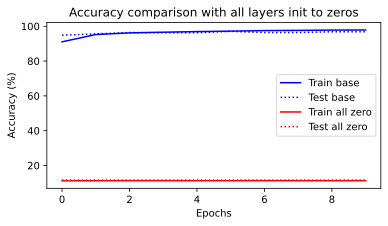

In [61]:
plt.figure(figsize=(6,3), dpi=135)

plt.plot(range(len(TrainAcc_base)),TrainAcc_base,'b-', range(len(TestAcc_base)),TestAcc_base ,'b:')
plt.plot(range(len(TrainAcc_allzero)),TrainAcc_allzero,'r-', range(len(TestAcc_allzero)),TestAcc_allzero ,'r:')

plt.legend(['Train base','Test base','Train all zero','Test all zero'])
plt.title('Accuracy comparison with all layers init to zeros')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

plt.show()

#### Conclusion : 
Above model is showing chance level performance

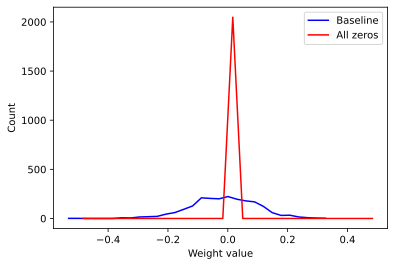

In [63]:
# Show the distributions in a histogram
plt.figure(figsize=(6,4), dpi=135)

# Histogram for baseline model
y,x = np.histogram(ANN_model.fc1.weight.data.flatten(), bins=30)
plt.plot((x[1:]+x[:-1])/2, y, 'b', label='Baseline')

# Histogram for ANN_model_zero
y,x = np.histogram(ANN_model_allzero.fc1.weight.data.flatten(),30)
plt.plot((x[1:]+x[:-1])/2,y,'r',label='All zeros')

plt.legend()
plt.xlabel('Weight value')
plt.ylabel('Count')
plt.show()

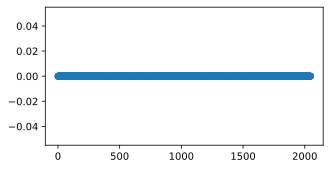

In [65]:
# After Training not even a single non-zero weight value.
plt.figure(figsize=(5,2.5))
plt.plot(ANN_model_allzero.fc1.weight.data.flatten(),'o');

### (iii) Maybe zero is problematic. What about initializing to 1's?

#### (a)  Create th ANN model

In [66]:
LR=0.001       # keep the LR low in case of ADAM, for SGD LR=0.01
ANN_model_allone, Lossfunc_allone, Optimizer_allone = createTheMNISTNet(LR=0.001)

#### (b) Set all the learnable parameters to zeros

In [67]:
# loop over parameters and set them all to ones

for p in ANN_model_allone.named_parameters():
        
    p[1].data = torch.zeros(size=p[1].data.shape )+1
    # aliter : p[1].data = torch.zeros_like( p[1].data )

#### (c) Training the Model

In [68]:
# This cell takes 3 mins
numepochs=10

# create and train a model with Batch-Normalization

TrainAcc_allone,TestAcc_allone,Losses_allone,trained_Model_allone =function2trainTheModel(
                                                               Model=ANN_model_allone , 
                                                               lossfunc=Lossfunc_allone , 
                                                               optimizer=Optimizer_allone,
                                                               train_loader=train_loader , 
                                                               test_loader=test_loader, 
                                                               epochs=numepochs)

#### (d) Results Visualization

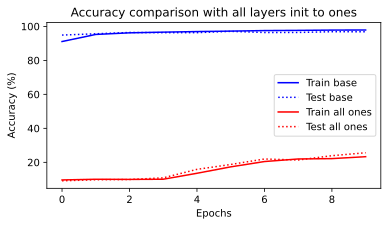

In [70]:
plt.figure(figsize=(6,3), dpi=135)

plt.plot(range(len(TrainAcc_base)),TrainAcc_base,'b-', range(len(TestAcc_base)),TestAcc_base ,'b:')
plt.plot(range(len(TrainAcc_allone)),TrainAcc_allone,'r-', range(len(TestAcc_allone)),TestAcc_allone ,'r:')

plt.legend(['Train base','Test base','Train all ones','Test all ones'])
plt.title('Accuracy comparison with all layers init to ones')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

plt.show()